# Computational Mathematics  <a class="tocSkip">

## Probability (and some first steps towards Machine Learning) <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Covariance-matrices-for-the-Iris-flowers-per-species" data-toc-modified-id="Homework---Covariance-matrices-for-the-Iris-flowers-per-species-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Covariance matrices for the Iris flowers per species</a></span></li><li><span><a href="#Homework---Computing-the-covariance-matrix" data-toc-modified-id="Homework---Computing-the-covariance-matrix-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Computing the covariance matrix</a></span></li><li><span><a href="#Homework---Die-rolling-experiment" data-toc-modified-id="Homework---Die-rolling-experiment-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Die-rolling experiment</a></span></li><li><span><a href="#Homework---The-Gaussian-integral" data-toc-modified-id="Homework---The-Gaussian-integral-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - The Gaussian integral</a></span></li><li><span><a href="#Homework---Normal-distribution-plotting" data-toc-modified-id="Homework---Normal-distribution-plotting-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Normal distribution plotting</a></span></li><li><span><a href="#Homework---Cumulative-distribution/density-function-(CDF)" data-toc-modified-id="Homework---Cumulative-distribution/density-function-(CDF)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Cumulative distribution/density function (CDF)</a></span></li><li><span><a href="#Homework---Monte-Carlo-simulation-[$\star$]" data-toc-modified-id="Homework---Monte-Carlo-simulation-[$\star$]-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Monte-Carlo simulation [$\star$]</a></span></li><li><span><a href="#Homework---Naive-Bayes-classifier" data-toc-modified-id="Homework---Naive-Bayes-classifier-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Homework - Naive Bayes classifier</a></span></li><li><span><a href="#Homework----Maximum-likelihood-estimation--[$\star\star$]" data-toc-modified-id="Homework----Maximum-likelihood-estimation--[$\star\star$]-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Homework -  Maximum likelihood estimation  [$\star\star$]</a></span></li><li><span><a href="#Homework---The-logistic-function-and-its-derivative" data-toc-modified-id="Homework---The-logistic-function-and-its-derivative-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Homework - The logistic function and its derivative</a></span></li><li><span><a href="#Homework---PCA-for-the-Iris-dataset" data-toc-modified-id="Homework---PCA-for-the-Iris-dataset-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Homework - PCA for the Iris dataset</a></span><ul class="toc-item"><li><span><a href="#Try-implementing-things-yourself-to-&quot;demystify&quot;-a-little-what-scikit-learn-is-doing-under-the-hood-[$\star\star$]" data-toc-modified-id="Try-implementing-things-yourself-to-&quot;demystify&quot;-a-little-what-scikit-learn-is-doing-under-the-hood-[$\star\star$]-1.11.1"><span class="toc-item-num">1.11.1&nbsp;&nbsp;</span>Try implementing things yourself to "demystify" a little what scikit-learn is doing under the hood [$\star\star$]</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [2]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
# https://seaborn.pydata.org/
# "Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics."
import seaborn as sns
# switch to seaborn figure aesthetic defaults
#sns.set_theme()
sns.set()

## Homework - Covariance matrices for the Iris flowers per species

Recreate the covariance "eye-ball" correlation guessing and associated calculation for each Iris flower species in turn, i.e. do it on a per-colour basis.

# Homework

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
irisdf = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                      columns=iris['feature_names']+['target'])


In [5]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


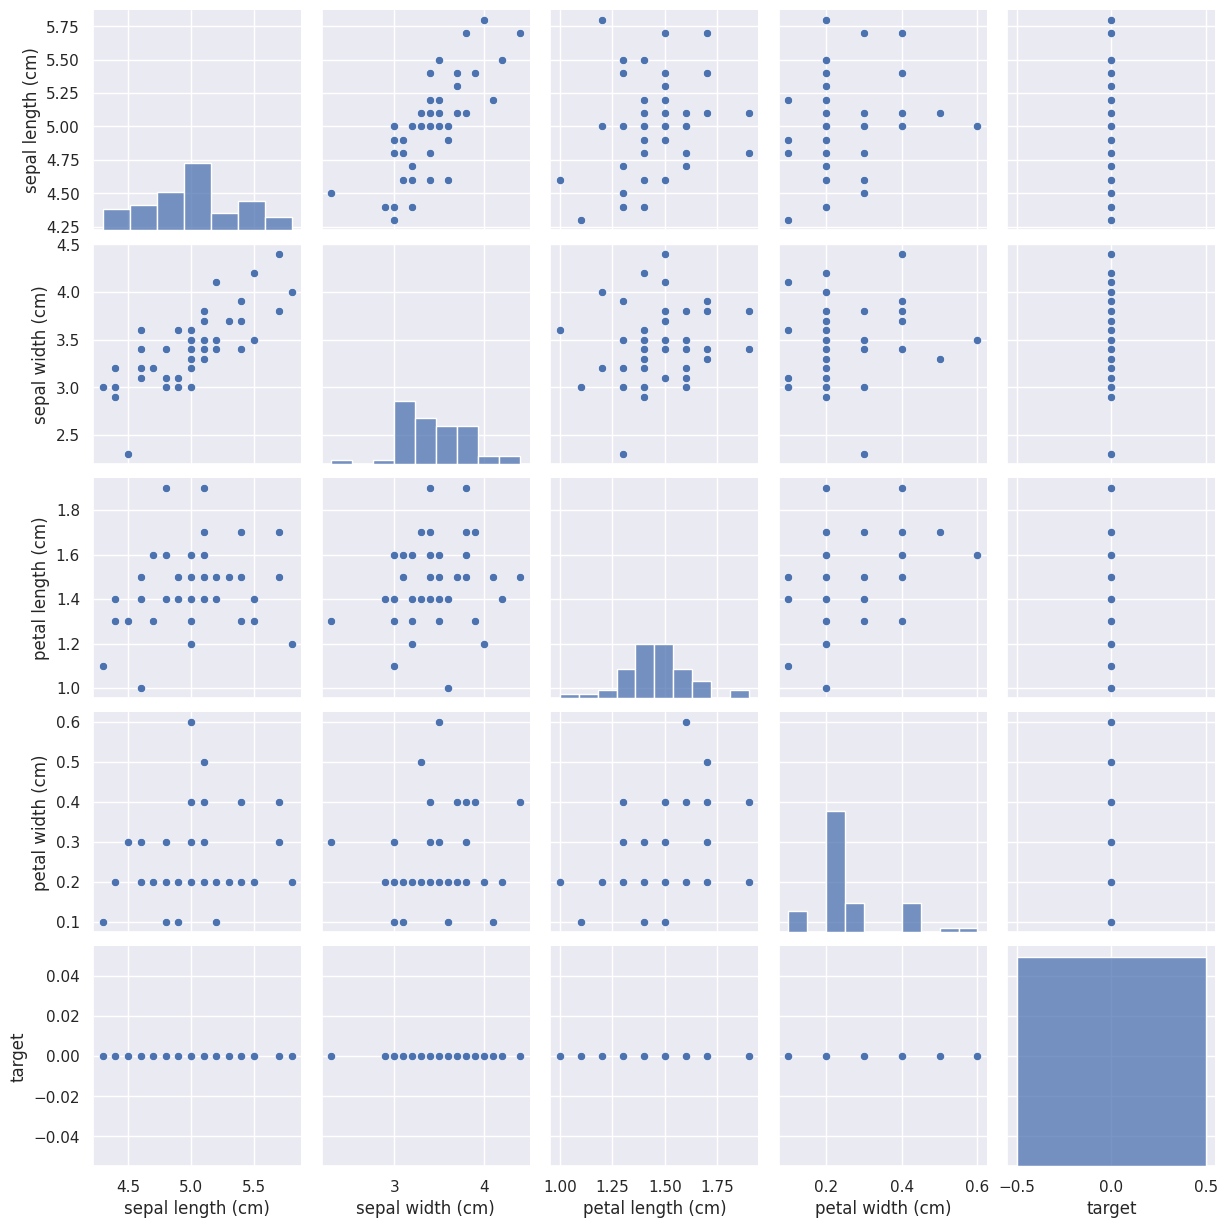

In [6]:
iris_setosa_df=irisdf.loc[irisdf['target']==0]
sns.pairplot(iris_setosa_df,vars=iris_setosa_df[:-1])

In [9]:
iris_setosa_df.iloc[:,:-1].cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.124249,0.099216,0.016355,0.010331
sepal width (cm),0.099216,0.143690,0.011698,0.009298
petal length (cm),0.016355,0.011698,0.030159,0.006069
petal width (cm),0.010331,0.009298,0.006069,0.011106


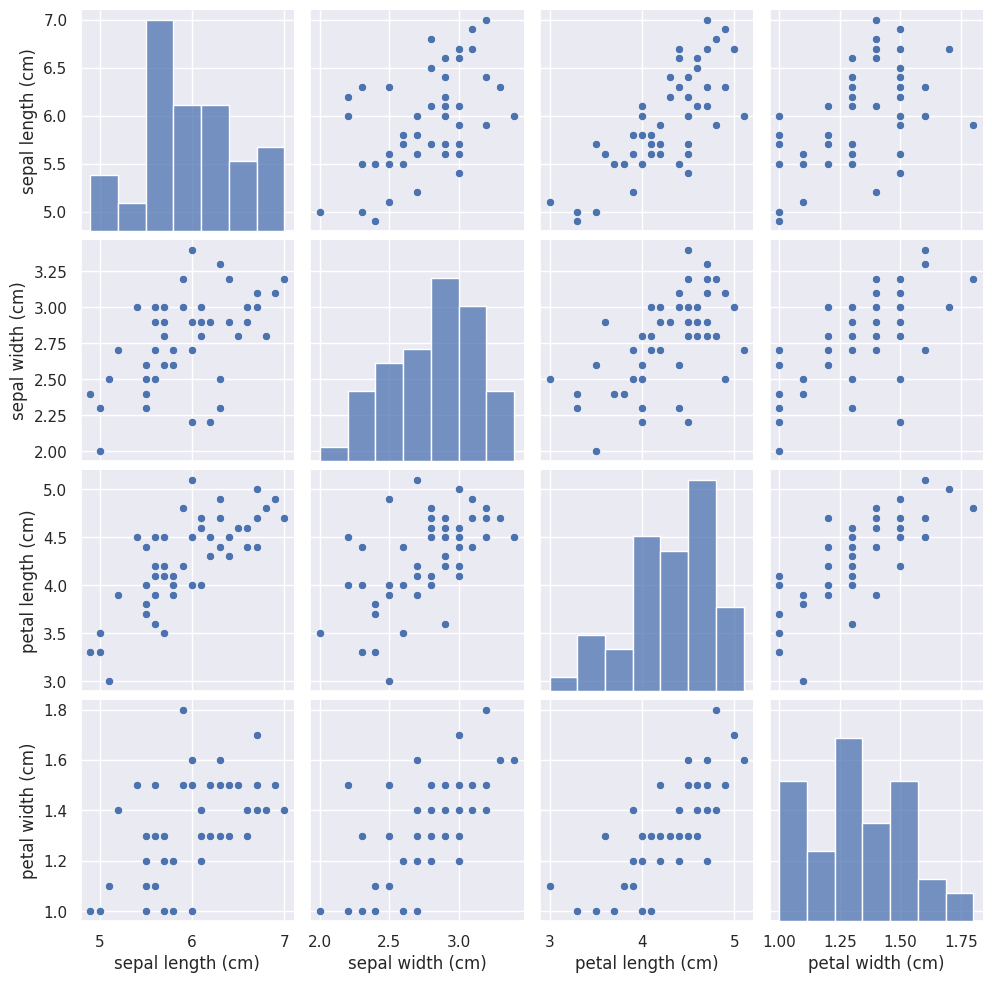

In [12]:
iris_versicolor_df=irisdf.loc[irisdf['target']==1]
sns.pairplot(iris_versicolor_df,vars=iris_versicolor_df.columns[:-1])

In [13]:
iris_versicolor_df.iloc[:,:-1].cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.266433,0.085184,0.182898,0.055780
sepal width (cm),0.085184,0.098469,0.082653,0.041204
petal length (cm),0.182898,0.082653,0.220816,0.073102
petal width (cm),0.055780,0.041204,0.073102,0.039106


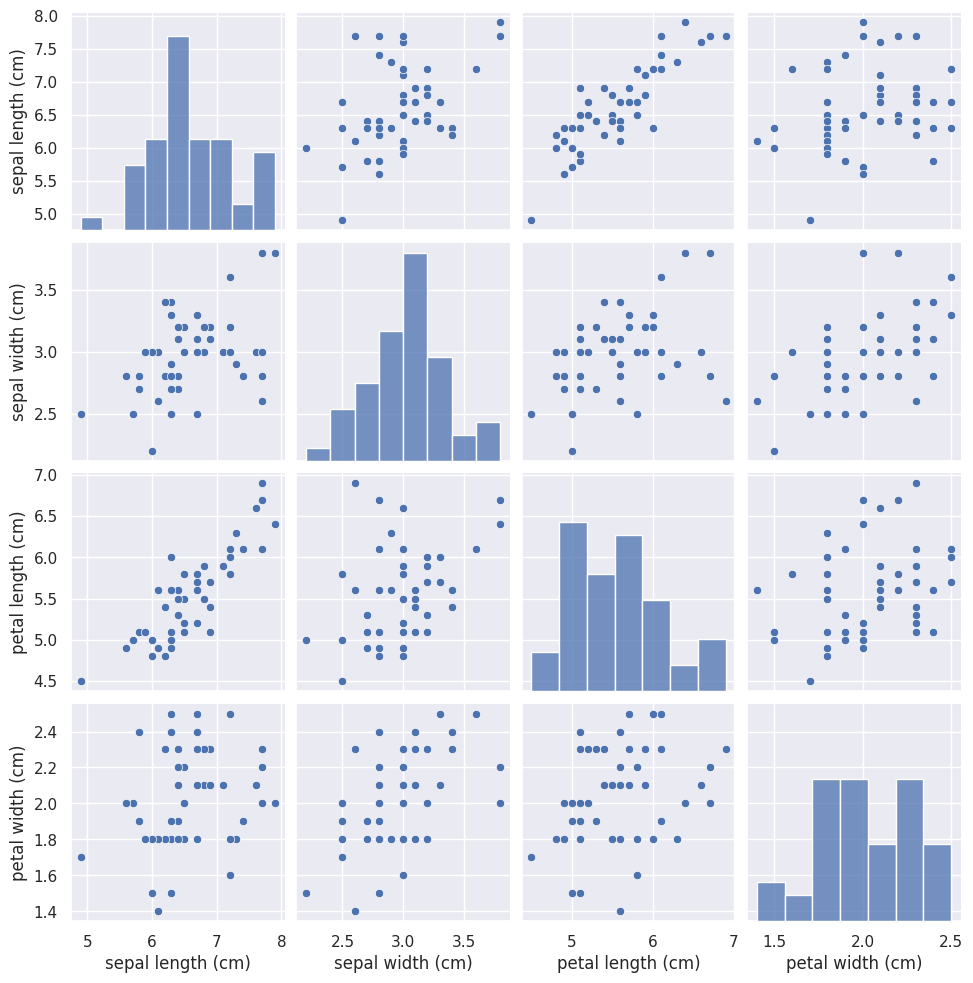

In [14]:
iris_virginica_df = irisdf.loc[irisdf['target']==2]
sns.pairplot(iris_virginica_df,vars=iris_virginica_df.columns[:-1])

In [16]:
iris_versicolor_df.iloc[:,:-1].cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.266433,0.085184,0.182898,0.055780
sepal width (cm),0.085184,0.098469,0.082653,0.041204
petal length (cm),0.182898,0.082653,0.220816,0.073102
petal width (cm),0.055780,0.041204,0.073102,0.039106


## Homework - Computing the covariance matrix

Recall from class we used Pandas `cov()` to compute the covariance matrix for the first four data columns of the Iris dataset (repeated in next well).

Of course this is convenient, but doesn't help confirm out mathematical understanding of what is going on.

Try computing this $4\times 4$ matrix yourself from first principles using NumPy alone (and not using NumPy's `cov()`!!

Speccifically, convert the Pandas data frame for the first 4 columns of data to a NumPy array (which should then be of size 50 x 4)

In [19]:
X = iris_virginica_df.iloc[:,:-1].to_numpy()
Xc = X - X.mean(axis=0,keepdims=True)
C = (1/Xc.shape[0]) * Xc.T@Xc
print(C) 
C = (1/(Xc.shape[0]-1)) * Xc.T @ Xc
print(C)
print(np.allclose(C,iris_virginica_df.iloc[:,:-1].cov().to_numpy()))

[[0.396256 0.091888 0.297224 0.048112]
 [0.091888 0.101924 0.069952 0.046676]
 [0.297224 0.069952 0.298496 0.047848]
 [0.048112 0.046676 0.047848 0.073924]]
[[0.40434286 0.09376327 0.3032898  0.04909388]
 [0.09376327 0.10400408 0.07137959 0.04762857]
 [0.3032898  0.07137959 0.30458776 0.04882449]
 [0.04909388 0.04762857 0.04882449 0.07543265]]
True


## Homework - Die-rolling experiment

Investigate how the probabilities computed for the die-rolling experiment equalise as you increase the number of times you roll the die.

In [22]:
def dice_experiment(n):
    return np.random.randint(low=1,high=7,size=n)

def probabilities(outcomes):
    values,counts = np.unique(outcomes,return_counts=True)
    n = len(outcomes)
    return values, counts/n

def plot_probability_mass_function(values,probabilities):
    plt.stem(values, probabilities, use_line_collection=True)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$P(x)$')
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.show()

/tmp/ipykernel_629/1688413516.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(values, probabilities, use_line_collection=True)


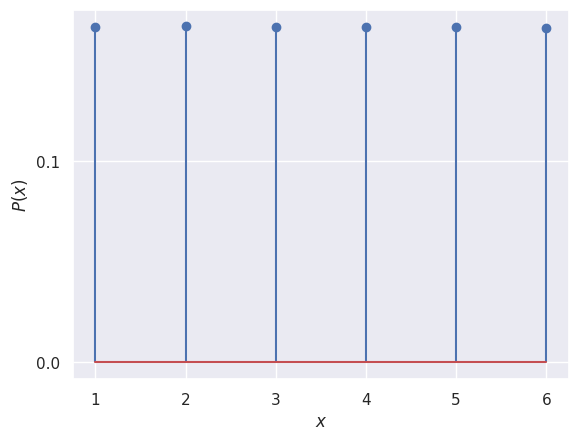

0.0007159999999999944


In [23]:
n = 1_000_000
outcomes = dice_experiment(n)
plot_probability_mass_function(*probabilities(outcomes))
print(np.max(probabilities(outcomes)[1]) - np.min(probabilities(outcomes)[1]))

In [27]:
for n in 10**np.arange(8):
    outcomes = dice_experiment(n)
    print(n, np.max(probabilities(outcomes)[1]) - np.min(probabilities(outcomes)[1]))

1 0.0
10 0.19999999999999998
100 0.08000000000000002
1000 0.017999999999999988
10000 0.008899999999999991
100000 0.0027699999999999947
1000000 0.0010090000000000099
10000000 0.0002711999999999992


## Homework - The Gaussian integral

A useful definite integral to know is the area under the function $e^{-x^2}$ over the whole real line:

$$\int_{-\infty}^{\infty} e^{-x^2}\, dx = \sqrt{\pi}$$

This result is known as the [Gaussian integral](https://en.wikipedia.org/wiki/Gaussian_integral>).

Read the description at the above link for how this integral can be (relatively) easily established if you know about polar coordinates and know the "trick".

<br>

Once we have this key result we can establish that 

$$\int_{-\infty}^{\infty} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 }\, dx = \sigma\sqrt{2\pi}$$

and thus by dividing through by the quantity on the RHS we have a function

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 }$$

(note that this is the [**Gaussian function**](https://en.wikipedia.org/wiki/Gaussian_function))which has the property that its integral over the entire real line is unity.

<br>

Can you see how to establish that 

$$\int_{-\infty}^{\infty} e^{-x^2}\, dx = \sqrt{\pi}  
\implies
\int_{-\infty}^{\infty} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 }\, dx = \sigma\sqrt{2\pi}
$$

through two changes of variables?

## Homework - Normal distribution plotting

As mentioned in class, take the code that randomly draws data from a normal distribution, plot it with different numbers of bins, sample size etc, and check how well it agrees with the normal distribution/Gaussian function.

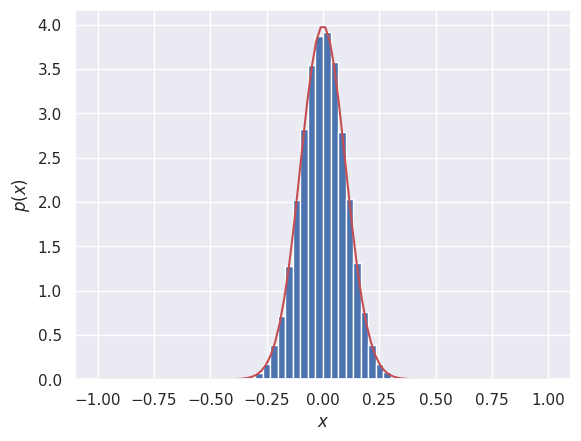

In [32]:
np.random.seed(1)
mean = 0
standard_deviation = 0.1
n = 100_000
outcomes = np.random.normal(loc=mean,scale=standard_deviation,size=n)
nbins = 30
hist = plt.hist(outcomes, bins=nbins, range=(-0.5,0.5),density=True)

normal_distribution = st.norm(mean,standard_deviation)
x_value = np.linspace(-1,1,100)
y_value = normal_distribution.pdf(x_value)

plt.plot(x_value,y_value,'r')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.show()

plt.show()

## Homework - Cumulative distribution/density function (CDF)

Recall the following plot from the lecture that used `normal_distribution.cdf`.

Recreate this plot using only data obtained from `normal_distribution.pdf` and the mathematical definition of the CDF in terms of the PDF.

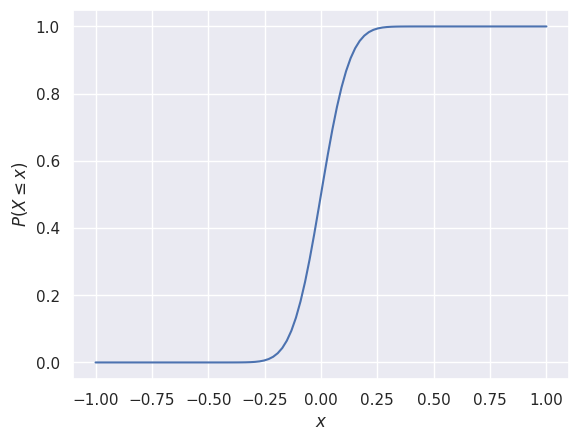

In [33]:
mean = 0
standard_deviation = 0.1

# Define the normal distribution
normal_distribution = st.norm(mean, standard_deviation)

# Compute CDF values at a sequence of x locations between -1 and 1
x_values = np.linspace(-1, 1, 100)
y_values = normal_distribution.cdf(x_values)

# Plot PDF
plt.plot(x_values, y_values)
plt.xlabel(r'$x$')
plt.ylabel(r'$P(X\leq x)$')
plt.show()

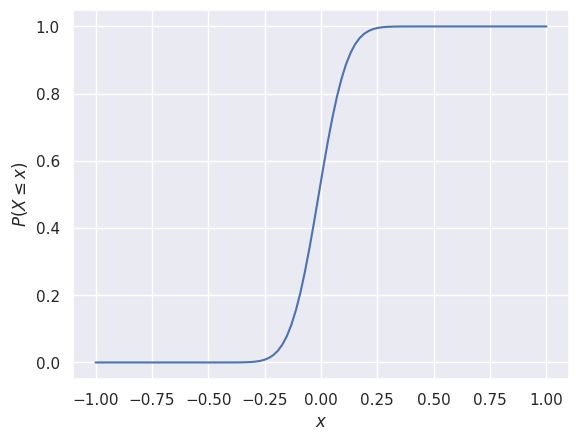

In [36]:
mean = 0
standard_deviation = 0.1
normal_distribution = st.norm(mean,standard_deviation)
x_value = np.linspace(-1,1,100)
dx = x_value[1] - x_value[0]
y_value = np.zeros_like(x_value)

for i,x in enumerate(x_value[1:]):
    y_value[i+1] = y_value[i] + normal_distribution.pdf(x_value[i+1])*dx

plt.plot(x_value,y_value)
plt.xlabel(r'$x$')
plt.ylabel(r'$P(X\leq x)$')
plt.show()

<div class="optional">
    
## Homework - Monte-Carlo simulation [$\star$]

Extend the calculation of $\pi$ example from class to use a sphere within a box of unit size, i.e. with one corner at the origin $(0,0,0)$ and the other corners at
$(1,0,0)$, $(0,1,0)$, ..., $(1,1,1)$.

</div>

In [37]:
import random
n_total = 1_000_000
x = np.random.uniform(low=0,high=1,size=n_total)
z = np.random.uniform(low=0,high=1,size=n_total)
y = np.random.uniform(low=0,high=1,size=n_total)
r2 = ((x-0.5)**2) + ((y-0.5)**2) + ((z-0.5)**2)
n_circle = sum(r2 <= (0.5**2))
pi_estimate = 6 * n_circle / n_total
print(f'The estimate of pi is {pi_estimate}.')


The estimate of pi is 3.142494.


## Homework - Naive Bayes classifier


Repeat the naive Bayes classification for the Iris dataset, but use [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the dataset into test and training sets, using the training set for training and test set to calculate the accuracy in the end. 

Below is the code and application from class that gave an accuracy of 96%.

If we more correctly split our training and test data how might we expect our accuracy to change? 

In [38]:
# Calculate the means and standard deviations for our four features and three species
means = irisdf.groupby('target').mean().to_numpy()
stds = irisdf.groupby('target').std().to_numpy()


# Define the normal distributions for each
distributions = []
for mvec, sdvec in zip(means, stds):
    distributions.append([st.norm(m, sd) for m, sd in zip(mvec, sdvec)])

# Since the smallest measurement in the dataset is 0.1 cm,
# we use the range (x-eps) - (x+eps) (with eps=0.05) to calculate the probability.
def calc_probability(x, distribution, eps=0.05):
    # use the cdf = cumulative density function
    return distribution.cdf(x+eps) - distribution.cdf(x-eps)

def cls_probablility(data, cls, distributions):
    # initialise p - as we're going to be multiplying probabilities, initialise it to 1
    p = 1
    # for every feature, calculate its probability and multiply the results together
    for feat in range(4):
        p *= calc_probability(data[feat], distributions[cls][feat])    
    return p



def calc_likelihood(data):
    class_probs = []
    for cls in range(3):
        p = cls_probablility(data, cls, distributions)
        class_probs.append(p)
    return class_probs



# Subscripting to remove the last column which is the target variable
# these are therefore the means and stds of the entire 150 rows of data, 
# i.e. all of our measurements
means = irisdf.mean().to_numpy()[0:4]
stds = irisdf.std().to_numpy()[0:4]

prior_dists = [st.norm(m, s) for m, s in zip(means, stds)]

def calc_prior_X(data):
    p = 1
    for feat in range(4):
        p *= calc_probability(data[feat], prior_dists[feat])
    return p


def calc_naive_bayes(data):
    likelihood = calc_likelihood(data)
    # From the data, we know that all three classes are equally likely
    class_prior = [0.33, 0.33, 0.33]
    data_prior = calc_prior_X(data)
    
    class_densities = [(l*cp) / data_prior for l, cp in zip(likelihood, class_prior)]
    class_probs = [cd / sum(class_densities) for cd in class_densities]
    
    return class_probs



# Now we will be using our trained model to do inference 
predictions = [np.argmax(calc_naive_bayes(X)) for X in iris['data']]

correct_predictions = [1 if prediction==target else 0 for prediction, target in zip(predictions, iris['target'])]

accuracy = float(sum(correct_predictions)/len(correct_predictions))

print(f'Accuracy = {accuracy}')

Accuracy = 0.96


<div class="advanced">
    
## Homework -  Maximum likelihood estimation  [$\star\star$]

Investigate what happens if we don't use all 100 chips in the MLE example from class.

Generalise the example so you seek to minimise the negative log likelihood instead of maximising the likelihood.

</div>

[-0.0, -0.0, 2.4300973216649216e-11, 6.137985937021722e-09, 1.2635391528814635e-07, 8.789996957945375e-07, 1.28951910141748e-06, 6.007959545732754e-07, 4.551541376388765e-08, 2.2656779998364665e-11, -0.0]
Likelihood maximaised at: 0.6


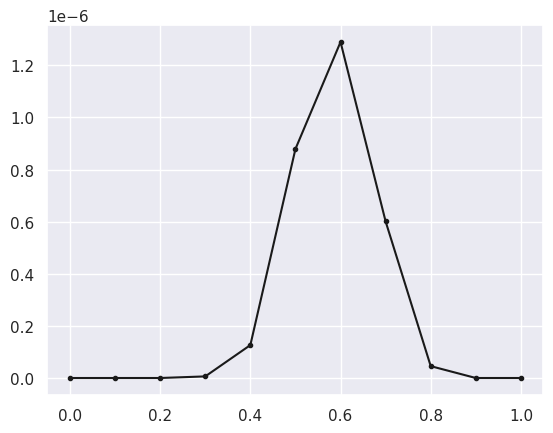

In [41]:
import random
import math
random.seed(42)
def draw(frac_red,k=20):
    return random.sample(['red']*int(frac_red*100) + ['green']*int((1-frac_red)*100), k=k)

def calc_prob_single(outcome,frac_red):
    assert(outcome in ('red','green'))
    if outcome == 'red':
        return frac_red
    else:
        return 1 - frac_red
    
def update_frac(frac_red, total, result):
    nums = [int(frac_red*total), int((1-frac_red)*total)]
    
    if result =='red':
        nums[0] -= 1
    else:
        nums[1] -= 1
    return float(nums[0]/sum(nums))

def calc_prob(results, frac_red, total):
    prob = 1
    for result in results:
        p = calc_prob_single(result, frac_red)
        prob *= p
        frac_red = update_frac(frac_red,total, result)
    return prob

TRUE_PROPORTION = 0.6
results = draw(TRUE_PROPORTION,k=100)
allks = [x/10 for x in range(0,11)]
n_chips = 20
probs = [calc_prob(results[0:n_chips],x,100) for x in allks]
print(probs)
print('Likelihood maximaised at:', allks[np.argmax(probs)])

plt.clf()
plt.plot(allks, probs, 'k.-')
plt.show()

In [42]:
from math import log
def calc_nll(results, frac_red, total):
    nll = 0
    for result in results:
        p = calc_prob_single(result,frac_red)
        nll += -log(max(p,1e-10))
        frac_red = update_frac(frac_red, total, result)
    return nll

[1075.6450928330858, 879.0082533538063, 670.5208281717355, 457.2894816280023, 241.1513400319454, 78.1561294240732, 62.40869046173652, 138.89965178880988, 371.24915370051207, 577.4675448682095, 752.4918149543813]
Neg log likelihood linimised at frac: 0.6


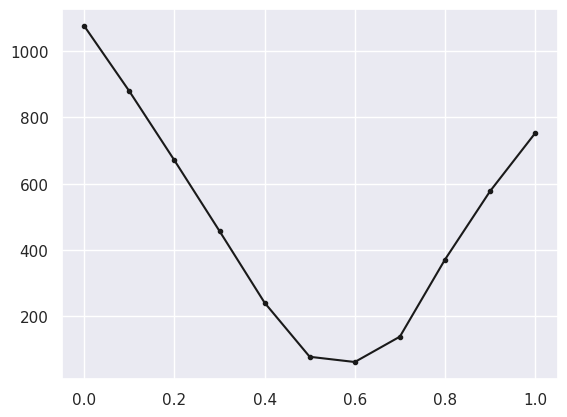

In [44]:
TRUE_PROPORTION = 0.6
results = draw(TRUE_PROPORTION,k=100)
allks = [x/10 for x in range(0,11)]
n_chips = 80

nlls = [calc_nll(results[0:n_chips], x, 100) for x in allks]
print(nlls)
print('Neg log likelihood linimised at frac:',allks[np.argmin(nlls)])
plt.clf()
plt.plot(allks, nlls, 'k.-')
plt.show()


## Homework - The logistic function and its derivative

Plot the logistic function

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

Compute and plot its derivative over the interval $z \in [-10,10]$.

How would you update this function so that it was centred at $z=5$, and had a "tighter" (i.e. faster) jump from zero to one?

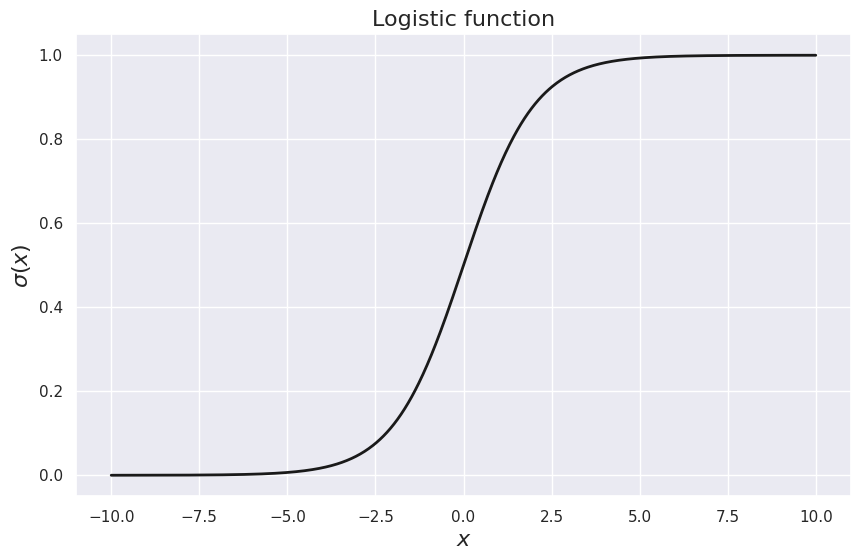

In [48]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(111)
ax1.set_title('Logistic function', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$\sigma(x)$',fontsize=16)

def logistic_fun(x):
    return 1 / (1+np.exp(-x))

x = np.linspace(-10,10,1000)
ax1.plot(x,logistic_fun(x),'k', lw=2,label='Logistic function')

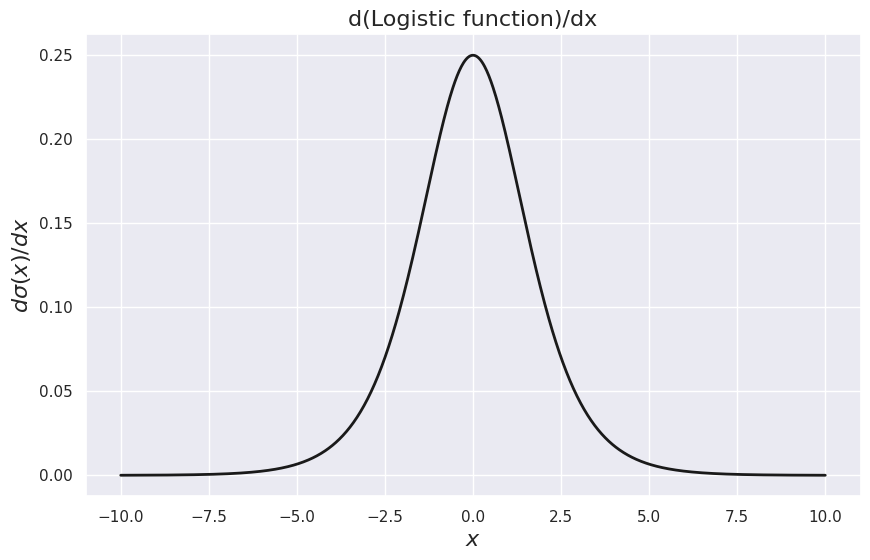

In [50]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(111)

ax1.set_title('d(Logistic function)/dx',fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$d\sigma(x)/dx$', fontsize=16)

def dlogistic_fun(x): 
    return np.exp(x)/(1+np.exp(x))**2

x = np.linspace(-10,10,1000)
ax1.plot(x,dlogistic_fun(x), 'k',lw=2, label='Logistic function dervative')

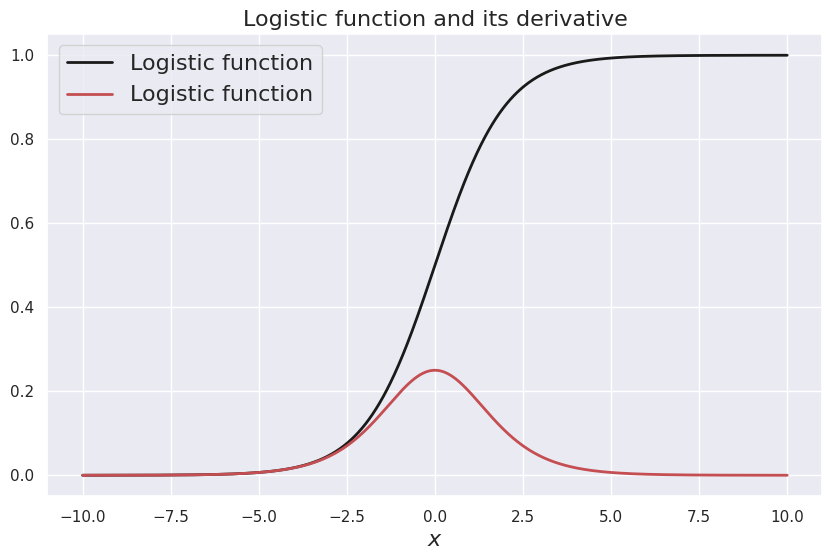

In [51]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(111)
ax1.set_title('Logistic function and its derivative', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
x = np.linspace(-10,10,1000)
ax1.plot(x,logistic_fun(x), 'k', lw=2, label='Logistic function')
ax1.plot(x,dlogistic_fun(x), 'r', lw=2,label='Logistic function')
ax1.legend(loc='best', fontsize=16)

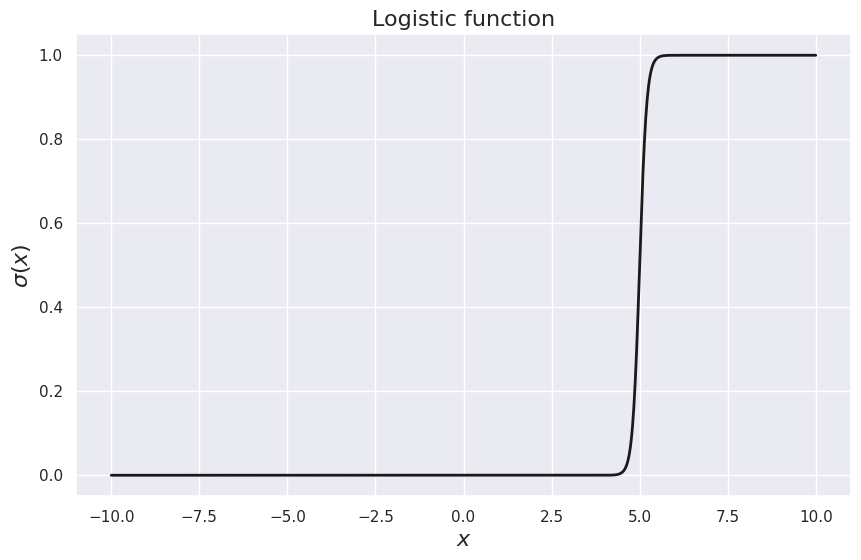

In [52]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(111)
ax1.set_title('Logistic function', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$\sigma(x)$', fontsize=16)

def logistic_fun_shift_tight(x):
    return 1 / (1+np.exp(-10*(x-5)))
x = np.linspace(-10,10,1000)
ax1.plot(x,logistic_fun_shift_tight(x), 'k', lw=2, label='Logistic function')


## Homework - PCA for the Iris dataset

We saw in lecture 3 the singular value decomposition (SVD), and I noted that it's closely related to the concept of principal component analysis (PCA).

Read through this material on the application of PCA - see the links in the lecture notebook as well as this application to the Iris dataset

- <https://www.kaggle.com/shrutimechlearn/step-by-step-pca-with-iris-dataset>

See also

- <https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html>
- <https://scikit-learn.org/stable/modules/decomposition.html#pca>


<br>

As a reminder on one of the links I gave earlier on the PCA in general, take a look at:

- * [PCA for Dummies](http://www.billconnelly.net/?p=697)

<br>
<br>

### Try implementing things yourself to "demystify" a little what scikit-learn is doing under the hood [$\star\star$]

As well as reading through you could try recreating the scikit-learn PCA results for the Iris data set - try reducing the dimension from 4 features to 2. You could try via an SVD calculation (cf. L3), or you could try baed on computing the e'vals and e'vectors of the covariance matrix.

(150, 2)


Text(0.5, 1.0, 'Compare with just plotting first two features')

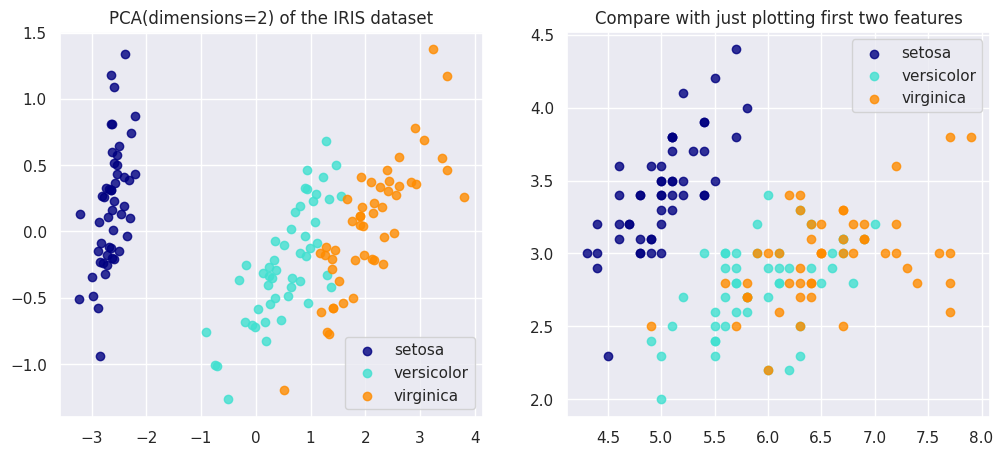

In [61]:
from sklearn.datasets import load_iris
from sklearn import decomposition

iris = load_iris()
X = iris.data
y = iris.target
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xp = pca.transform(X)
print(np.shape(Xp))

target_names = iris.target_names
colors = ['navy', 'turquoise','darkorange']
for color,i,target_names in zip(colors,[0,1,2],target_names):
    ax1.scatter(
        Xp[y==i, 0], Xp[y==i, 1], color=color, alpha=0.8, label=target_names)
ax1.legend(loc='best')
ax1.set_title('PCA(dimensions=2) of the IRIS dataset')


colors = ['navy', 'turquoise','darkorange']
for color,i,target_name in zip(colors, [0,1,2],iris.target_names):
    ax2.scatter(
        X[y==i, 0], X[y==i,1], color=color, alpha=0.8, label=target_name)
ax2.legend(loc='best')
ax2.set_title('Compare with just plotting first two features')

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')